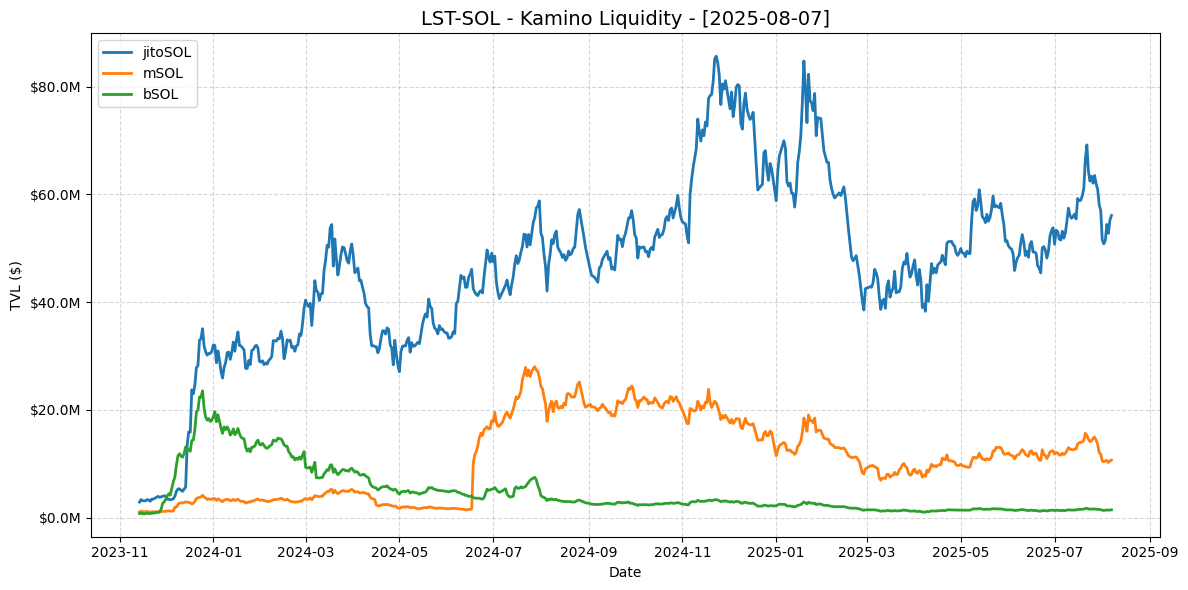

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df_meteora = pd.read_csv("jitoSOL-SOL, Meteora - Kamino Liquidity.csv")
df_orca = pd.read_csv("jitoSOL-SOL, Orca - Kamino Liquidity.csv")
df_raydium = pd.read_csv("jitoSOL-SOL, Raydium - Kamino Liquidity.csv")

df_meteora['DATE'] = pd.to_datetime(df_meteora['DATE']).dt.date
df_orca['DATE'] = pd.to_datetime(df_orca['DATE']).dt.date
df_raydium['DATE'] = pd.to_datetime(df_raydium['DATE']).dt.date

df_meteora_daily = df_meteora.groupby('DATE')['TVL'].mean().reset_index()
df_orca_daily = df_orca.groupby('DATE')['TVL'].mean().reset_index()
df_raydium_daily = df_raydium.groupby('DATE')['TVL'].mean().reset_index()

df_combined = pd.merge(df_meteora_daily, df_orca_daily, on='DATE', how='outer', suffixes=('_meteora', '_orca'))
df_combined = pd.merge(df_combined, df_raydium_daily, on='DATE', how='outer')
df_combined.rename(columns={'TVL': 'TVL_raydium'}, inplace=True)

df_combined = df_combined.fillna(0)
df_combined['TVL_total'] = df_combined['TVL_meteora'] + df_combined['TVL_orca'] + df_combined['TVL_raydium']
df_combined = df_combined.sort_values('DATE')

df_bsol = pd.read_csv("bSOL-SOL, Orca - Kamino Liquidity.csv")
df_msol = pd.read_csv("mSOL-SOL, Raydium - Kamino Liquidity.csv")

df_bsol['DATE'] = pd.to_datetime(df_bsol['DATE']).dt.date
df_msol['DATE'] = pd.to_datetime(df_msol['DATE']).dt.date

df_bsol_daily = df_bsol.groupby('DATE')['TVL'].mean().reset_index()
df_msol_daily = df_msol.groupby('DATE')['TVL'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_combined['DATE'], df_combined['TVL_total'], linewidth=2, label='jitoSOL', color='C0')
plt.plot(df_msol_daily['DATE'], df_msol_daily['TVL'], linewidth=2, label='mSOL', color='C1')
plt.plot(df_bsol_daily['DATE'], df_bsol_daily['TVL'], linewidth=2, label='bSOL', color='C2')

plt.title("LST-SOL - Kamino Liquidity - [2025-08-07]", fontsize=14)
plt.xlabel("Date")
plt.ylabel("TVL ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M' if x < 1e9 else f'${x/1e9:.1f}B'))

plt.tight_layout()
plt.show()

In [33]:
import pandas as pd

df_meteora = pd.read_csv("jitoSOL-SOL, Meteora - Kamino Liquidity.csv")
df_orca = pd.read_csv("jitoSOL-SOL, Orca - Kamino Liquidity.csv")
df_raydium = pd.read_csv("jitoSOL-SOL, Raydium - Kamino Liquidity.csv")

df_meteora['DATE'] = pd.to_datetime(df_meteora['DATE']).dt.date
df_orca['DATE'] = pd.to_datetime(df_orca['DATE']).dt.date
df_raydium['DATE'] = pd.to_datetime(df_raydium['DATE']).dt.date

df_meteora_daily = df_meteora.groupby('DATE')['TVL'].mean().reset_index()
df_orca_daily = df_orca.groupby('DATE')['TVL'].mean().reset_index()
df_raydium_daily = df_raydium.groupby('DATE')['TVL'].mean().reset_index()

df_combined = pd.merge(df_meteora_daily, df_orca_daily, on='DATE', how='outer', suffixes=('_meteora', '_orca'))
df_combined = pd.merge(df_combined, df_raydium_daily, on='DATE', how='outer')
df_combined.rename(columns={'TVL': 'TVL_raydium'}, inplace=True)

df_combined = df_combined.fillna(0)
df_combined['TVL_total'] = df_combined['TVL_meteora'] + df_combined['TVL_orca'] + df_combined['TVL_raydium']
df_combined = df_combined.sort_values('DATE')

df_bsol = pd.read_csv("bSOL-SOL, Orca - Kamino Liquidity.csv")
df_msol = pd.read_csv("mSOL-SOL, Raydium - Kamino Liquidity.csv")

df_bsol['DATE'] = pd.to_datetime(df_bsol['DATE']).dt.date
df_msol['DATE'] = pd.to_datetime(df_msol['DATE']).dt.date

df_bsol_daily = df_bsol.groupby('DATE')['TVL'].mean().reset_index()
df_msol_daily = df_msol.groupby('DATE')['TVL'].mean().reset_index()

# Get timeframe
start_date = min(df_combined['DATE'].min(), df_msol_daily['DATE'].min(), df_bsol_daily['DATE'].min())
end_date = max(df_combined['DATE'].max(), df_msol_daily['DATE'].max(), df_bsol_daily['DATE'].max())
timeframe_label = f"{start_date.strftime('%b. %-d, %Y')} – {end_date.strftime('%b. %-d, %Y')}"

def max_drawdown_tvl(series):
   running_max = series.cummax()
   drawdown = ((series - running_max) / running_max) * 100
   return drawdown.min()

summary = pd.DataFrame({
   "Timeframe": [timeframe_label] * 3,
   "Current TVL ($)": [
       f"${df_combined['TVL_total'].iloc[-1]:,.0f}",
       f"${df_msol_daily['TVL'].iloc[-1]:,.0f}",
       f"${df_bsol_daily['TVL'].iloc[-1]:,.0f}"
   ],
   "Peak TVL ($)": [
       f"${df_combined['TVL_total'].max():,.0f}",
       f"${df_msol_daily['TVL'].max():,.0f}",
       f"${df_bsol_daily['TVL'].max():,.0f}"
   ],
   "Average TVL ($)": [
       f"${df_combined['TVL_total'].mean():,.0f}",
       f"${df_msol_daily['TVL'].mean():,.0f}",
       f"${df_bsol_daily['TVL'].mean():,.0f}"
   ],
   "TVL Volatility (%)": [
       f"{(df_combined['TVL_total'].std() / df_combined['TVL_total'].mean() * 100):.1f}%",
       f"{(df_msol_daily['TVL'].std() / df_msol_daily['TVL'].mean() * 100):.1f}%",
       f"{(df_bsol_daily['TVL'].std() / df_bsol_daily['TVL'].mean() * 100):.1f}%"
   ],
   "Max Drawdown (%)": [
       f"{max_drawdown_tvl(df_combined['TVL_total']):.1f}%",
       f"{max_drawdown_tvl(df_msol_daily['TVL']):.1f}%",
       f"{max_drawdown_tvl(df_bsol_daily['TVL']):.1f}%"
   ]
}, index=["jitoSOL", "mSOL", "bSOL"])

summary.style.set_properties(**{'text-align': 'left'}).set_table_styles([
   {"selector": "th", "props": [("text-align", "left")]}
])

,Timeframe,Current TVL ($),Peak TVL ($),Average TVL ($),TVL Volatility (%),Max Drawdown (%)
jitoSOL,"Nov. 14, 2023 – Aug. 7, 2025","$56,081,871","$85,646,753","$46,206,331",35.4%,-55.3%
mSOL,"Nov. 14, 2023 – Aug. 7, 2025","$10,675,551","$28,016,956","$10,942,981",67.8%,-75.2%
bSOL,"Nov. 14, 2023 – Aug. 7, 2025","$1,444,593","$23,545,252","$4,850,554",95.0%,-95.7%


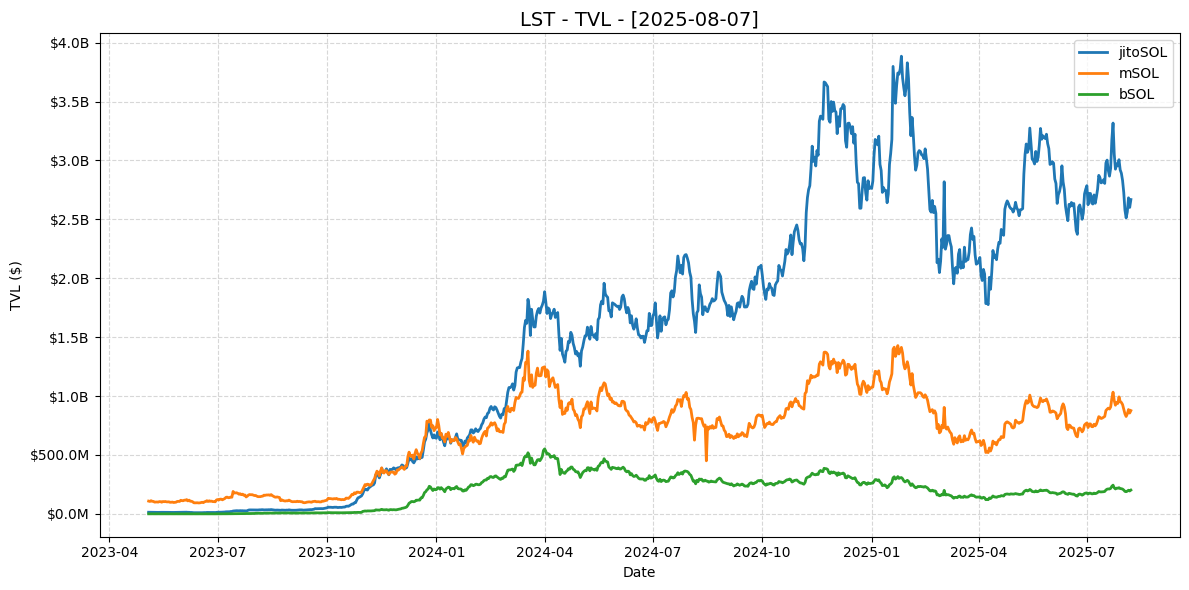

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df_tvl_jito = pd.read_csv("jitoSOL - TVL (USD).csv")
df_tvl_bsol = pd.read_csv("bSOL - TVL (USD).csv")
df_tvl_msol = pd.read_csv("mSOL - TVL (USD).csv")

df_tvl_jito['Date'] = pd.to_datetime(df_tvl_jito['Date'], dayfirst=True).dt.date
df_tvl_bsol['Date'] = pd.to_datetime(df_tvl_bsol['Date'], dayfirst=True).dt.date
df_tvl_msol['Date'] = pd.to_datetime(df_tvl_msol['Date'], dayfirst=True).dt.date

jito_dates = set(df_tvl_jito['Date'])
bsol_dates = set(df_tvl_bsol['Date'])
msol_dates = set(df_tvl_msol['Date'])

common_dates = jito_dates & bsol_dates & msol_dates
start_date = min(common_dates)

df_tvl_jito = df_tvl_jito[df_tvl_jito['Date'] >= start_date]
df_tvl_bsol = df_tvl_bsol[df_tvl_bsol['Date'] >= start_date]
df_tvl_msol = df_tvl_msol[df_tvl_msol['Date'] >= start_date]

plt.figure(figsize=(12, 6))
plt.plot(df_tvl_jito['Date'], df_tvl_jito['USD TVL'], linewidth=2, label='jitoSOL', color='C0')
plt.plot(df_tvl_msol['Date'], df_tvl_msol['USD TVL'], linewidth=2, label='mSOL', color='C1')
plt.plot(df_tvl_bsol['Date'], df_tvl_bsol['USD TVL'], linewidth=2, label='bSOL', color='C2')

plt.title("LST - TVL - [2025-08-07]", fontsize=14)
plt.xlabel("Date")
plt.ylabel("TVL ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M' if x < 1e9 else f'${x/1e9:.1f}B'))

plt.tight_layout()
plt.show()

In [34]:
import pandas as pd

df_tvl_jito = pd.read_csv("jitoSOL - TVL (USD).csv")
df_tvl_bsol = pd.read_csv("bSOL - TVL (USD).csv")
df_tvl_msol = pd.read_csv("mSOL - TVL (USD).csv")

df_tvl_jito['Date'] = pd.to_datetime(df_tvl_jito['Date'], dayfirst=True).dt.date
df_tvl_bsol['Date'] = pd.to_datetime(df_tvl_bsol['Date'], dayfirst=True).dt.date
df_tvl_msol['Date'] = pd.to_datetime(df_tvl_msol['Date'], dayfirst=True).dt.date

jito_dates = set(df_tvl_jito['Date'])
bsol_dates = set(df_tvl_bsol['Date'])
msol_dates = set(df_tvl_msol['Date'])

common_dates = jito_dates & bsol_dates & msol_dates
start_date = min(common_dates)

df_tvl_jito = df_tvl_jito[df_tvl_jito['Date'] >= start_date]
df_tvl_bsol = df_tvl_bsol[df_tvl_bsol['Date'] >= start_date]
df_tvl_msol = df_tvl_msol[df_tvl_msol['Date'] >= start_date]

# Get timeframe
end_date = max(df_tvl_jito['Date'].max(), df_tvl_bsol['Date'].max(), df_tvl_msol['Date'].max())
timeframe_label = f"{start_date.strftime('%b. %-d, %Y')} – {end_date.strftime('%b. %-d, %Y')}"

def max_drawdown_tvl(series):
   running_max = series.cummax()
   drawdown = ((series - running_max) / running_max) * 100
   return drawdown.min()

def growth_rate(series):
   return ((series.iloc[-1] / series.iloc[0]) - 1) * 100

summary = pd.DataFrame({
   "Timeframe": [timeframe_label] * 3,
   "Current TVL ($)": [
       f"${df_tvl_jito['USD TVL'].iloc[-1]:,.0f}",
       f"${df_tvl_msol['USD TVL'].iloc[-1]:,.0f}",
       f"${df_tvl_bsol['USD TVL'].iloc[-1]:,.0f}"
   ],
   "Peak TVL ($)": [
       f"${df_tvl_jito['USD TVL'].max():,.0f}",
       f"${df_tvl_msol['USD TVL'].max():,.0f}",
       f"${df_tvl_bsol['USD TVL'].max():,.0f}"
   ],
   "Average TVL ($)": [
       f"${df_tvl_jito['USD TVL'].mean():,.0f}",
       f"${df_tvl_msol['USD TVL'].mean():,.0f}",
       f"${df_tvl_bsol['USD TVL'].mean():,.0f}"
   ],
   "Total Growth (%)": [
       f"{growth_rate(df_tvl_jito['USD TVL']):.1f}%",
       f"{growth_rate(df_tvl_msol['USD TVL']):.1f}%",
       f"{growth_rate(df_tvl_bsol['USD TVL']):.1f}%"
   ],
   "Max Drawdown (%)": [
       f"{max_drawdown_tvl(df_tvl_jito['USD TVL']):.1f}%",
       f"{max_drawdown_tvl(df_tvl_msol['USD TVL']):.1f}%",
       f"{max_drawdown_tvl(df_tvl_bsol['USD TVL']):.1f}%"
   ]
}, index=["jitoSOL", "mSOL", "bSOL"])

summary.style.set_properties(**{'text-align': 'left'}).set_table_styles([
   {"selector": "th", "props": [("text-align", "left")]}
])

,Timeframe,Current TVL ($),Peak TVL ($),Average TVL ($),Total Growth (%),Max Drawdown (%)
jitoSOL,"May. 4, 2023 – Aug. 7, 2025","$2,667,973,476","$3,884,589,485","$1,552,207,324",18897.5%,-54.3%
mSOL,"May. 4, 2023 – Aug. 7, 2025","$876,752,991","$1,428,545,471","$682,663,027",707.4%,-67.4%
bSOL,"May. 4, 2023 – Aug. 7, 2025","$202,309,828","$551,697,075","$199,581,866",28311.6%,-78.1%


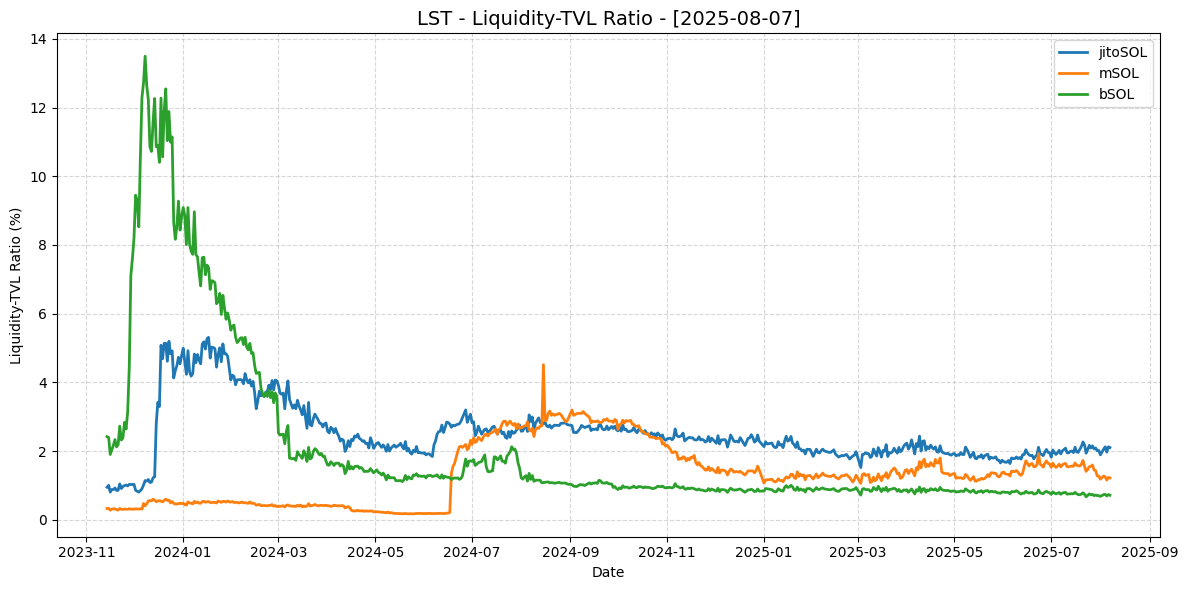

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df_meteora = pd.read_csv("jitoSOL-SOL, Meteora - Kamino Liquidity.csv")
df_orca = pd.read_csv("jitoSOL-SOL, Orca - Kamino Liquidity.csv")
df_raydium = pd.read_csv("jitoSOL-SOL, Raydium - Kamino Liquidity.csv")

df_meteora['DATE'] = pd.to_datetime(df_meteora['DATE']).dt.date
df_orca['DATE'] = pd.to_datetime(df_orca['DATE']).dt.date
df_raydium['DATE'] = pd.to_datetime(df_raydium['DATE']).dt.date

df_meteora_daily = df_meteora.groupby('DATE')['TVL'].mean().reset_index()
df_orca_daily = df_orca.groupby('DATE')['TVL'].mean().reset_index()
df_raydium_daily = df_raydium.groupby('DATE')['TVL'].mean().reset_index()

df_combined = pd.merge(df_meteora_daily, df_orca_daily, on='DATE', how='outer', suffixes=('_meteora', '_orca'))
df_combined = pd.merge(df_combined, df_raydium_daily, on='DATE', how='outer')
df_combined.rename(columns={'TVL': 'TVL_raydium'}, inplace=True)

df_combined = df_combined.fillna(0)
df_combined['Liquidity'] = df_combined['TVL_meteora'] + df_combined['TVL_orca'] + df_combined['TVL_raydium']
df_combined = df_combined.sort_values('DATE')

df_bsol = pd.read_csv("bSOL-SOL, Orca - Kamino Liquidity.csv")
df_msol = pd.read_csv("mSOL-SOL, Raydium - Kamino Liquidity.csv")

df_bsol['DATE'] = pd.to_datetime(df_bsol['DATE']).dt.date
df_msol['DATE'] = pd.to_datetime(df_msol['DATE']).dt.date

df_bsol_daily = df_bsol.groupby('DATE')['TVL'].mean().reset_index()
df_msol_daily = df_msol.groupby('DATE')['TVL'].mean().reset_index()

df_tvl_jito = pd.read_csv("jitoSOL - TVL (USD).csv")
df_tvl_bsol = pd.read_csv("bSOL - TVL (USD).csv")
df_tvl_msol = pd.read_csv("mSOL - TVL (USD).csv")

df_tvl_jito['Date'] = pd.to_datetime(df_tvl_jito['Date'], dayfirst=True).dt.date
df_tvl_bsol['Date'] = pd.to_datetime(df_tvl_bsol['Date'], dayfirst=True).dt.date
df_tvl_msol['Date'] = pd.to_datetime(df_tvl_msol['Date'], dayfirst=True).dt.date

df_ratio_jito = pd.merge(df_combined[['DATE', 'Liquidity']], df_tvl_jito, left_on='DATE', right_on='Date', how='inner')
df_ratio_jito = df_ratio_jito[df_ratio_jito['Liquidity'] > 0]
df_ratio_jito['Liquidity_TVL_Ratio'] = (df_ratio_jito['Liquidity'] / df_ratio_jito['USD TVL']) * 100

df_ratio_bsol = pd.merge(df_bsol_daily, df_tvl_bsol, left_on='DATE', right_on='Date', how='inner')
df_ratio_bsol = df_ratio_bsol[df_ratio_bsol['TVL'] > 0]
df_ratio_bsol['Liquidity_TVL_Ratio'] = (df_ratio_bsol['TVL'] / df_ratio_bsol['USD TVL']) * 100

df_ratio_msol = pd.merge(df_msol_daily, df_tvl_msol, left_on='DATE', right_on='Date', how='inner')
df_ratio_msol = df_ratio_msol[df_ratio_msol['TVL'] > 0]
df_ratio_msol['Liquidity_TVL_Ratio'] = (df_ratio_msol['TVL'] / df_ratio_msol['USD TVL']) * 100

plt.figure(figsize=(12, 6))
plt.plot(df_ratio_jito['DATE'], df_ratio_jito['Liquidity_TVL_Ratio'], linewidth=2, label='jitoSOL', color='C0')
plt.plot(df_ratio_msol['DATE'], df_ratio_msol['Liquidity_TVL_Ratio'], linewidth=2, label='mSOL', color='C1')
plt.plot(df_ratio_bsol['DATE'], df_ratio_bsol['Liquidity_TVL_Ratio'], linewidth=2, label='bSOL', color='C2')

plt.title("LST - Liquidity-TVL Ratio - [2025-08-07]", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Liquidity-TVL Ratio (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [35]:
import pandas as pd

df_meteora = pd.read_csv("jitoSOL-SOL, Meteora - Kamino Liquidity.csv")
df_orca = pd.read_csv("jitoSOL-SOL, Orca - Kamino Liquidity.csv")
df_raydium = pd.read_csv("jitoSOL-SOL, Raydium - Kamino Liquidity.csv")

df_meteora['DATE'] = pd.to_datetime(df_meteora['DATE']).dt.date
df_orca['DATE'] = pd.to_datetime(df_orca['DATE']).dt.date
df_raydium['DATE'] = pd.to_datetime(df_raydium['DATE']).dt.date

df_meteora_daily = df_meteora.groupby('DATE')['TVL'].mean().reset_index()
df_orca_daily = df_orca.groupby('DATE')['TVL'].mean().reset_index()
df_raydium_daily = df_raydium.groupby('DATE')['TVL'].mean().reset_index()

df_combined = pd.merge(df_meteora_daily, df_orca_daily, on='DATE', how='outer', suffixes=('_meteora', '_orca'))
df_combined = pd.merge(df_combined, df_raydium_daily, on='DATE', how='outer')
df_combined.rename(columns={'TVL': 'TVL_raydium'}, inplace=True)

df_combined = df_combined.fillna(0)
df_combined['Liquidity'] = df_combined['TVL_meteora'] + df_combined['TVL_orca'] + df_combined['TVL_raydium']
df_combined = df_combined.sort_values('DATE')

df_bsol = pd.read_csv("bSOL-SOL, Orca - Kamino Liquidity.csv")
df_msol = pd.read_csv("mSOL-SOL, Raydium - Kamino Liquidity.csv")

df_bsol['DATE'] = pd.to_datetime(df_bsol['DATE']).dt.date
df_msol['DATE'] = pd.to_datetime(df_msol['DATE']).dt.date

df_bsol_daily = df_bsol.groupby('DATE')['TVL'].mean().reset_index()
df_msol_daily = df_msol.groupby('DATE')['TVL'].mean().reset_index()

df_tvl_jito = pd.read_csv("jitoSOL - TVL (USD).csv")
df_tvl_bsol = pd.read_csv("bSOL - TVL (USD).csv")
df_tvl_msol = pd.read_csv("mSOL - TVL (USD).csv")

df_tvl_jito['Date'] = pd.to_datetime(df_tvl_jito['Date'], dayfirst=True).dt.date
df_tvl_bsol['Date'] = pd.to_datetime(df_tvl_bsol['Date'], dayfirst=True).dt.date
df_tvl_msol['Date'] = pd.to_datetime(df_tvl_msol['Date'], dayfirst=True).dt.date

df_ratio_jito = pd.merge(df_combined[['DATE', 'Liquidity']], df_tvl_jito, left_on='DATE', right_on='Date', how='inner')
df_ratio_jito = df_ratio_jito[df_ratio_jito['Liquidity'] > 0]
df_ratio_jito['Liquidity_TVL_Ratio'] = (df_ratio_jito['Liquidity'] / df_ratio_jito['USD TVL']) * 100

df_ratio_bsol = pd.merge(df_bsol_daily, df_tvl_bsol, left_on='DATE', right_on='Date', how='inner')
df_ratio_bsol = df_ratio_bsol[df_ratio_bsol['TVL'] > 0]
df_ratio_bsol['Liquidity_TVL_Ratio'] = (df_ratio_bsol['TVL'] / df_ratio_bsol['USD TVL']) * 100

df_ratio_msol = pd.merge(df_msol_daily, df_tvl_msol, left_on='DATE', right_on='Date', how='inner')
df_ratio_msol = df_ratio_msol[df_ratio_msol['TVL'] > 0]
df_ratio_msol['Liquidity_TVL_Ratio'] = (df_ratio_msol['TVL'] / df_ratio_msol['USD TVL']) * 100

# Get timeframe
start_date = min(df_ratio_jito['DATE'].min(), df_ratio_bsol['DATE'].min(), df_ratio_msol['DATE'].min())
end_date = max(df_ratio_jito['DATE'].max(), df_ratio_bsol['DATE'].max(), df_ratio_msol['DATE'].max())
timeframe_label = f"{start_date.strftime('%b. %-d, %Y')} – {end_date.strftime('%b. %-d, %Y')}"

def efficiency_score(series):
   return series.quantile(0.75)

summary = pd.DataFrame({
   "Timeframe": [timeframe_label] * 3,
   "Current Ratio (%)": [
       f"{df_ratio_jito['Liquidity_TVL_Ratio'].iloc[-1]:.2f}%",
       f"{df_ratio_msol['Liquidity_TVL_Ratio'].iloc[-1]:.2f}%",
       f"{df_ratio_bsol['Liquidity_TVL_Ratio'].iloc[-1]:.2f}%"
   ],
   "Average Ratio (%)": [
       f"{df_ratio_jito['Liquidity_TVL_Ratio'].mean():.2f}%",
       f"{df_ratio_msol['Liquidity_TVL_Ratio'].mean():.2f}%",
       f"{df_ratio_bsol['Liquidity_TVL_Ratio'].mean():.2f}%"
   ],
   "Peak Ratio (%)": [
       f"{df_ratio_jito['Liquidity_TVL_Ratio'].max():.2f}%",
       f"{df_ratio_msol['Liquidity_TVL_Ratio'].max():.2f}%",
       f"{df_ratio_bsol['Liquidity_TVL_Ratio'].max():.2f}%"
   ],
   "Ratio Volatility (%)": [
       f"{df_ratio_jito['Liquidity_TVL_Ratio'].std():.2f}%",
       f"{df_ratio_msol['Liquidity_TVL_Ratio'].std():.2f}%",
       f"{df_ratio_bsol['Liquidity_TVL_Ratio'].std():.2f}%"
   ],
   "75th Percentile (%)": [
       f"{efficiency_score(df_ratio_jito['Liquidity_TVL_Ratio']):.2f}%",
       f"{efficiency_score(df_ratio_msol['Liquidity_TVL_Ratio']):.2f}%",
       f"{efficiency_score(df_ratio_bsol['Liquidity_TVL_Ratio']):.2f}%"
   ]
}, index=["jitoSOL", "mSOL", "bSOL"])

summary.style.set_properties(**{'text-align': 'left'}).set_table_styles([
   {"selector": "th", "props": [("text-align", "left")]}
])

,Timeframe,Current Ratio (%),Average Ratio (%),Peak Ratio (%),Ratio Volatility (%),75th Percentile (%)
jitoSOL,"Nov. 14, 2023 – Aug. 7, 2025",2.10%,2.51%,5.31%,0.88%,2.73%
mSOL,"Nov. 14, 2023 – Aug. 7, 2025",1.22%,1.29%,4.52%,0.87%,1.65%
bSOL,"Nov. 14, 2023 – Aug. 7, 2025",0.71%,2.14%,13.49%,2.60%,1.77%


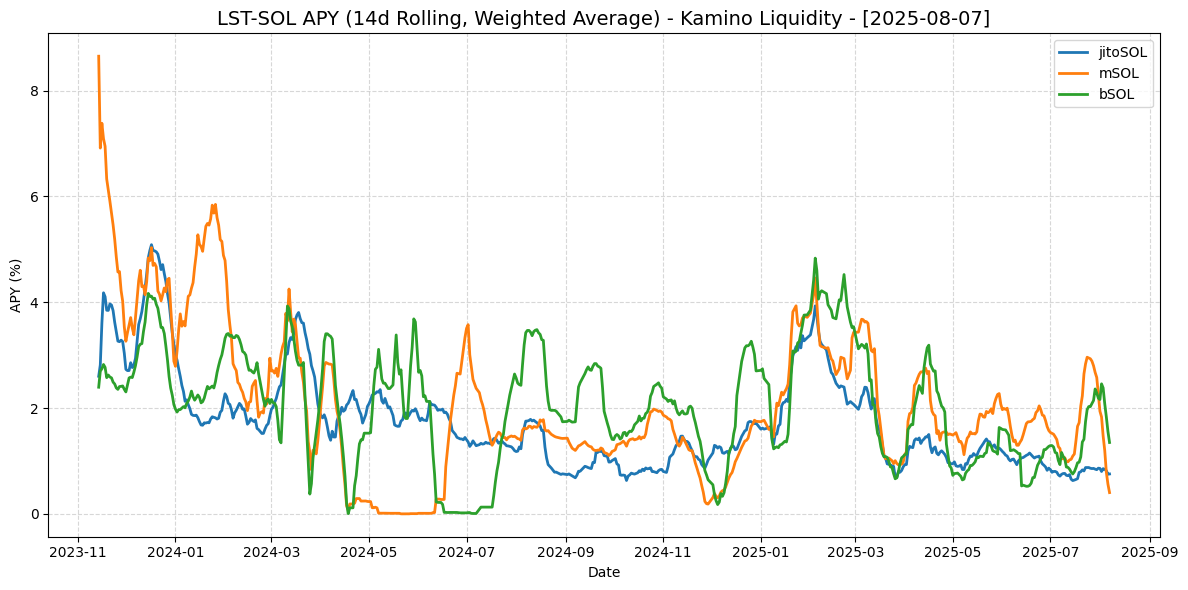

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df_meteora = pd.read_csv("jitoSOL-SOL, Meteora - Kamino Liquidity.csv")
df_orca = pd.read_csv("jitoSOL-SOL, Orca - Kamino Liquidity.csv")
df_raydium = pd.read_csv("jitoSOL-SOL, Raydium - Kamino Liquidity.csv")

df_meteora['DATE'] = pd.to_datetime(df_meteora['DATE']).dt.date
df_orca['DATE'] = pd.to_datetime(df_orca['DATE']).dt.date
df_raydium['DATE'] = pd.to_datetime(df_raydium['DATE']).dt.date

df_meteora_daily = df_meteora.groupby('DATE').agg({'APY': 'mean', 'TVL': 'mean'}).reset_index()
df_orca_daily = df_orca.groupby('DATE').agg({'APY': 'mean', 'TVL': 'mean'}).reset_index()
df_raydium_daily = df_raydium.groupby('DATE').agg({'APY': 'mean', 'TVL': 'mean'}).reset_index()

df_combined = pd.merge(df_meteora_daily, df_orca_daily, on='DATE', how='outer', suffixes=('_meteora', '_orca'))
df_combined = pd.merge(df_combined, df_raydium_daily, on='DATE', how='outer')
df_combined = df_combined.rename(columns={'APY': 'APY_raydium', 'TVL': 'TVL_raydium'})

df_combined = df_combined.fillna(0)

df_combined['total_weighted_apy'] = (df_combined['APY_meteora'] * df_combined['TVL_meteora'] + 
                                  df_combined['APY_orca'] * df_combined['TVL_orca'] + 
                                  df_combined['APY_raydium'] * df_combined['TVL_raydium'])

df_combined['total_tvl'] = df_combined['TVL_meteora'] + df_combined['TVL_orca'] + df_combined['TVL_raydium']

df_combined['weighted_apy'] = df_combined['total_weighted_apy'] / df_combined['total_tvl']
df_combined = df_combined[df_combined['total_tvl'] > 0]
df_combined = df_combined.sort_values('DATE')

df_msol = pd.read_csv("mSOL-SOL, Raydium - Kamino Liquidity.csv")
df_bsol = pd.read_csv("bSOL-SOL, Orca - Kamino Liquidity.csv")

df_msol['DATE'] = pd.to_datetime(df_msol['DATE']).dt.date
df_bsol['DATE'] = pd.to_datetime(df_bsol['DATE']).dt.date

df_msol_daily = df_msol.groupby('DATE')['APY'].mean().reset_index()
df_bsol_daily = df_bsol.groupby('DATE')['APY'].mean().reset_index()

df_combined['weighted_apy_capped'] = df_combined['weighted_apy'].clip(upper=df_combined['weighted_apy'].quantile(0.98))
df_msol_daily['APY_capped'] = df_msol_daily['APY'].clip(upper=df_msol_daily['APY'].quantile(0.98))
df_bsol_daily['APY_capped'] = df_bsol_daily['APY'].clip(upper=df_bsol_daily['APY'].quantile(0.98))

df_combined['weighted_apy_rolling'] = df_combined['weighted_apy_capped'].rolling(window=14, min_periods=1).mean()
df_msol_daily['APY_rolling'] = df_msol_daily['APY_capped'].rolling(window=14, min_periods=1).mean()
df_bsol_daily['APY_rolling'] = df_bsol_daily['APY_capped'].rolling(window=14, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_combined['DATE'], df_combined['weighted_apy_rolling'], linewidth=2, label='jitoSOL', color='C0')
plt.plot(df_msol_daily['DATE'], df_msol_daily['APY_rolling'], linewidth=2, label='mSOL', color='C1')
plt.plot(df_bsol_daily['DATE'], df_bsol_daily['APY_rolling'], linewidth=2, label='bSOL', color='C2')

plt.title("LST-SOL APY (14d Rolling, Weighted Average) - Kamino Liquidity - [2025-08-07]", fontsize=14)
plt.xlabel("Date")
plt.ylabel("APY (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [36]:
import pandas as pd

df_meteora = pd.read_csv("jitoSOL-SOL, Meteora - Kamino Liquidity.csv")
df_orca = pd.read_csv("jitoSOL-SOL, Orca - Kamino Liquidity.csv")
df_raydium = pd.read_csv("jitoSOL-SOL, Raydium - Kamino Liquidity.csv")

df_meteora['DATE'] = pd.to_datetime(df_meteora['DATE']).dt.date
df_orca['DATE'] = pd.to_datetime(df_orca['DATE']).dt.date
df_raydium['DATE'] = pd.to_datetime(df_raydium['DATE']).dt.date

df_meteora_daily = df_meteora.groupby('DATE').agg({'APY': 'mean', 'TVL': 'mean'}).reset_index()
df_orca_daily = df_orca.groupby('DATE').agg({'APY': 'mean', 'TVL': 'mean'}).reset_index()
df_raydium_daily = df_raydium.groupby('DATE').agg({'APY': 'mean', 'TVL': 'mean'}).reset_index()

df_combined = pd.merge(df_meteora_daily, df_orca_daily, on='DATE', how='outer', suffixes=('_meteora', '_orca'))
df_combined = pd.merge(df_combined, df_raydium_daily, on='DATE', how='outer')
df_combined = df_combined.rename(columns={'APY': 'APY_raydium', 'TVL': 'TVL_raydium'})

df_combined = df_combined.fillna(0)

df_combined['total_weighted_apy'] = (df_combined['APY_meteora'] * df_combined['TVL_meteora'] + 
                                  df_combined['APY_orca'] * df_combined['TVL_orca'] + 
                                  df_combined['APY_raydium'] * df_combined['TVL_raydium'])

df_combined['total_tvl'] = df_combined['TVL_meteora'] + df_combined['TVL_orca'] + df_combined['TVL_raydium']

df_combined['weighted_apy'] = df_combined['total_weighted_apy'] / df_combined['total_tvl']
df_combined = df_combined[df_combined['total_tvl'] > 0]
df_combined = df_combined.sort_values('DATE')

df_msol = pd.read_csv("mSOL-SOL, Raydium - Kamino Liquidity.csv")
df_bsol = pd.read_csv("bSOL-SOL, Orca - Kamino Liquidity.csv")

df_msol['DATE'] = pd.to_datetime(df_msol['DATE']).dt.date
df_bsol['DATE'] = pd.to_datetime(df_bsol['DATE']).dt.date

df_msol_daily = df_msol.groupby('DATE')['APY'].mean().reset_index()
df_bsol_daily = df_bsol.groupby('DATE')['APY'].mean().reset_index()

df_combined['weighted_apy_capped'] = df_combined['weighted_apy'].clip(upper=df_combined['weighted_apy'].quantile(0.98))
df_msol_daily['APY_capped'] = df_msol_daily['APY'].clip(upper=df_msol_daily['APY'].quantile(0.98))
df_bsol_daily['APY_capped'] = df_bsol_daily['APY'].clip(upper=df_bsol_daily['APY'].quantile(0.98))

df_combined['weighted_apy_rolling'] = df_combined['weighted_apy_capped'].rolling(window=14, min_periods=1).mean()
df_msol_daily['APY_rolling'] = df_msol_daily['APY_capped'].rolling(window=14, min_periods=1).mean()
df_bsol_daily['APY_rolling'] = df_bsol_daily['APY_capped'].rolling(window=14, min_periods=1).mean()

# Get timeframe
start_date = min(df_combined['DATE'].min(), df_msol_daily['DATE'].min(), df_bsol_daily['DATE'].min())
end_date = max(df_combined['DATE'].max(), df_msol_daily['DATE'].max(), df_bsol_daily['DATE'].max())
timeframe_label = f"{start_date.strftime('%b. %-d, %Y')} – {end_date.strftime('%b. %-d, %Y')}"

def apy_stability(series):
   return series.std()

summary = pd.DataFrame({
   "Timeframe": [timeframe_label] * 3,
   "Current APY (%)": [
       f"{df_combined['weighted_apy_rolling'].iloc[-1]:.2f}%",
       f"{df_msol_daily['APY_rolling'].iloc[-1]:.2f}%",
       f"{df_bsol_daily['APY_rolling'].iloc[-1]:.2f}%"
   ],
   "Average APY (%)": [
       f"{df_combined['weighted_apy_rolling'].mean():.2f}%",
       f"{df_msol_daily['APY_rolling'].mean():.2f}%",
       f"{df_bsol_daily['APY_rolling'].mean():.2f}%"
   ],
   "Peak APY (%)": [
       f"{df_combined['weighted_apy_rolling'].max():.2f}%",
       f"{df_msol_daily['APY_rolling'].max():.2f}%",
       f"{df_bsol_daily['APY_rolling'].max():.2f}%"
   ],
   "APY Volatility (%)": [
       f"{apy_stability(df_combined['weighted_apy_rolling']):.2f}%",
       f"{apy_stability(df_msol_daily['APY_rolling']):.2f}%",
       f"{apy_stability(df_bsol_daily['APY_rolling']):.2f}%"
   ],
   "Median APY (%)": [
       f"{df_combined['weighted_apy_rolling'].median():.2f}%",
       f"{df_msol_daily['APY_rolling'].median():.2f}%",
       f"{df_bsol_daily['APY_rolling'].median():.2f}%"
   ]
}, index=["jitoSOL", "mSOL", "bSOL"])

summary.style.set_properties(**{'text-align': 'left'}).set_table_styles([
   {"selector": "th", "props": [("text-align", "left")]}
])

,Timeframe,Current APY (%),Average APY (%),Peak APY (%),APY Volatility (%),Median APY (%)
jitoSOL,"Nov. 14, 2023 – Aug. 7, 2025",0.75%,1.74%,5.09%,0.92%,1.50%
mSOL,"Nov. 14, 2023 – Aug. 7, 2025",0.40%,2.09%,8.65%,1.42%,1.75%
bSOL,"Nov. 14, 2023 – Aug. 7, 2025",1.35%,1.99%,4.83%,1.04%,2.04%
